In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
nyc = pd.read_csv('nyc_weather.csv')

In [3]:
nyc

EST  Temperature  DewPoint  Humidity  Sea Level PressureIn  \
0    1/1/2016           38        23        52                 30.03   
1    1/2/2016           36        18        46                 30.02   
2    1/3/2016           40        21        47                 29.86   
3    1/4/2016           25         9        44                 30.05   
4    1/5/2016           20        -3        41                 30.57   
5    1/6/2016           33         4        35                 30.50   
6    1/7/2016           39        11        33                 30.28   
7    1/8/2016           39        29        64                 30.20   
8    1/9/2016           44        38        77                 30.16   
9   1/10/2016           50        46        71                 29.59   
10  1/11/2016           50         8        37                 29.92   
11  1/12/2016           35        15        53                 29.85   
12  1/13/2016           26         4        42                 29.94   
13  1/14/2016           30        12        47                 29.95   
14  1/15/2016           43        31        62                 29.82   
15  1/16/2016           47        37        70                 29.52   
16  1/17/2016           36        23        66                 29.78   
17  1/18/2016           25         6        53                 29.83   
18  1/19/2016           22         3        42                 30.03   
19  1/20/2016           32        15        49                 30.13   
20  1/21/2016           31        11        45                 30.15   
21  1/22/2016           26         6        41                 30.21   
22  1/23/2016           26        21        78                 29.77   
23  1/24/2016           28        11        53                 29.92   
24  1/25/2016           34        18        54                 30.25   
25  1/26/2016           43        29        56                 30.03   
26  1/27/2016           41        22        45                 30.03   
27  1/28/2016           50        20        51                 29.90   
28  1/29/2016           50        21        50                 29.58   
29  1/30/2016           50        16        46                 30.01   
30  1/31/2016           46        28        52                 29.90   

    VisibilityMiles  WindSpeedMPH  PrecipitationIn  CloudCover    Events  \
0                10           8.0             0.00           5       NaN   
1                10           7.0             0.00           3       NaN   
2                10           8.0             0.00           1       NaN   
3                10           9.0             0.00           3       NaN   
4                10           5.0             0.00           0       NaN   
5                10           4.0             0.00           0       NaN   
6                10           2.0             0.00           3       NaN   
7                10           4.0             0.00           8       NaN   
8                 9           8.0             1.20           8      Rain   
9                 4           NaN             1.80           7      Rain   
10               10           NaN             0.00           1       NaN   
11               10           6.0             0.00           4       NaN   
12               10          10.0             0.00           0       NaN   
13               10           5.0             0.00           7       NaN   
14                9           5.0             0.00           2       NaN   
15                8           7.0             0.24           7      Rain   
16                8           6.0             0.05           6  Fog-Snow   
17                9          12.0             0.03           2      Snow   
18               10          11.0             0.00           1       NaN   
19               10           6.0             0.00           2       NaN   
20               10           6.0             0.00           1       NaN   
21                9           NaN

In [4]:
n = (nyc['WindDirDegrees'] <= 45) | (nyc['WindDirDegrees'] >= 315)
e = (nyc['WindDirDegrees'] > 45) & (nyc['WindDirDegrees'] <= 135)
s = (nyc['WindDirDegrees'] > 135) & (nyc['WindDirDegrees'] <= 225)
w = (nyc['WindDirDegrees'] > 225) & (nyc['WindDirDegrees'] <= 315)

In [5]:
# nyc[n][['WindSpeedMPH','WindDirDegrees']]
nyc.loc[n, ['WindSpeedMPH','WindDirDegrees']].fillna(0)

WindSpeedMPH  WindDirDegrees
3            9.0             345
4            5.0             333
15           7.0             340
16           6.0             345
21           0.0              34
22          16.0              42
23           6.0             327

In [6]:
theta = np.array(nyc['WindSpeedMPH'].fillna(0))
radii = np.array(nyc['WindDirDegrees'].fillna(0))

ax = plt.subplot(111, projection='polar')
ax.bar(radii, theta, width=0.3, bottom=0.0, alpha=0.4)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.show()

In [7]:
ax = plt.subplot(111, projection='polar')
ax.bar(radii, theta, width=0.3, bottom=0.0, alpha=0.4)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetamin(-45)
ax.set_thetamax(45)
plt.title('North', pad=5)

plt.show()

In [8]:
ax = plt.subplot(111, projection='polar')
ax.bar(radii, theta, width=0.3, bottom=0.0, alpha=0.4)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetamin(45)
ax.set_thetamax(135)
plt.title('East', pad=35)

plt.show()

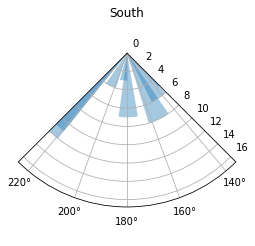

In [9]:
ax = plt.subplot(111, projection='polar')
ax.bar(radii, theta, width=0.3, alpha=0.4)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetamin(135)
ax.set_thetamax(225)
plt.title('South', pad=5)

plt.show()

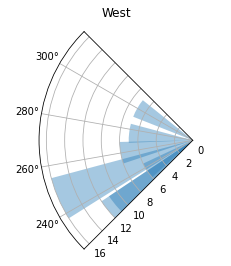

In [10]:
ax = plt.subplot(111, projection='polar')
ax.bar(radii, theta, width=0.3, bottom=0.0, alpha=0.4)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetamin(225)
ax.set_thetamax(315)
plt.title('West', pad=15)

plt.show()

## task 1
Визначити напрямки вiтру N,E,S,W за мiсяць

In [11]:
def task1(degree):
    if degree == 'N':
        print('Days:', len(nyc.loc[n, ['WindSpeedMPH','WindDirDegrees']].fillna(0)))
        print(nyc.loc[n, ['WindSpeedMPH','WindDirDegrees']].fillna(0))
    elif degree == 'E':
        print('Days:', len(nyc.loc[e, ['WindSpeedMPH','WindDirDegrees']].fillna(0)))
        print(nyc.loc[e, ['WindSpeedMPH','WindDirDegrees']].fillna(0))
    elif degree == 'S':
        print('Days:', len(nyc.loc[s, ['WindSpeedMPH','WindDirDegrees']].fillna(0)))
        print(nyc.loc[s, ['WindSpeedMPH','WindDirDegrees']].fillna(0))
    elif degree == 'W':
        print('Days:', len(nyc.loc[w, ['WindSpeedMPH','WindDirDegrees']].fillna(0)))
        print(nyc.loc[w, ['WindSpeedMPH','WindDirDegrees']].fillna(0))

interact(task1, degree=['N','E','S','W']);

interactive(children=(Dropdown(description='degree', options=('N', 'E', 'S', 'W'), value='N'), Output()), _dom…

## Task 2
Для кожного напрямку вiтру визначити дати з максимальною швид-кiстю

In [12]:
def task2(degree):
    if degree == 'N':
        print(nyc.loc[n, ['EST', 'WindSpeedMPH']].fillna(0).max().to_string())
    elif degree == 'E':
        print(nyc.loc[e, ['EST', 'WindSpeedMPH']].fillna(0).max().to_string())
    elif degree == 'S':
        print(nyc.loc[s, ['EST', 'WindSpeedMPH']].fillna(0).max().to_string())
    elif degree == 'W':
        print(nyc.loc[w, ['EST', 'WindSpeedMPH']].fillna(0).max().to_string())

interact(task2, degree=['N','E','S','W']);

interactive(children=(Dropdown(description='degree', options=('N', 'E', 'S', 'W'), value='N'), Output()), _dom…

## Task 3
Визначити переважаючий вiтер

In [13]:
m = max(len(n[n == True]), len(e[e == True]), len(s[s == True]), len(w[w == True]))
if m == len(n[n == True]):
    print('North was perevazhayychui')
elif m == len(e[e == True]):
    print('East was perevazhayychui')
elif m == len(s[s == True]):
    print('South was perevazhayychui')
elif m == len(w[w == True]):
    print('West was perevazhayychui')

West was perevazhayychui


## Task 4
Для кожного напрямку вiтру визначити дати з опадами

In [14]:
def task4(degree):
    if degree == 'N':
        return nyc[n][['EST','Events']].dropna()
    elif degree == 'E':
        return nyc[e][['EST','Events']].dropna()
    elif degree == 'S':
        return nyc[s][['EST','Events']].dropna()
    elif degree == 'W':
        return nyc[w][['EST','Events']].dropna()

interact(task4, degree=['N','E','S','W']);

interactive(children=(Dropdown(description='degree', options=('N', 'E', 'S', 'W'), value='N'), Output()), _dom…

## Task 5
Який був вітер коли випало найбільше опадів

In [15]:
task5 = nyc[nyc['PrecipitationIn'] == nyc['PrecipitationIn'].max()]
task5

EST  Temperature  DewPoint  Humidity  Sea Level PressureIn  \
23  1/24/2016           28        11        53                 29.92   

    VisibilityMiles  WindSpeedMPH  PrecipitationIn  CloudCover Events  \
23                8           6.0              3.0           3   Snow   

    WindDirDegrees  
23             327

In [16]:
if task5['WindDirDegrees'].item() in np.array(nyc.loc[n, 'WindDirDegrees']):
    print('Wind was north, and the speed was:', task5['WindSpeedMPH'].item())
elif task5['WindDirDegrees'].item() in np.array(nyc.loc[e, 'WindDirDegrees']):
    print('Wind was East, and the speed was:', task5['WindSpeedMPH'].item())
elif task5['WindDirDegrees'].item() in np.array(nyc.loc[s, 'WindDirDegrees']):
    print('Wind was South, and the speed was:', task5['WindSpeedMPH'].item())
elif task5['WindDirDegrees'].item() in np.array(nyc.loc[w, 'WindDirDegrees']):
    print('Wind was West, and the speed was:', task5['WindSpeedMPH'].item())

Wind was north, and the speed was: 6.0
